#### **Project 2  Exploratory Data Analysis (EDA)**   
***Выполнила: Хуснуллина Наиля***  
***
**ОГЛАВЛЕНИЕ** <a name="start"></a>

1. [Подключение библиотек](#Подключение_библиотек)  
2. [Первичный анализ](#Первичный_анализ)  
   2.1. [Анализ столбца school](#school)  
   2.2. [Анализ столбца age](#age)  
   2.3. [Анализ столбца Medu](#Medu)  
   2.4. [Анализ столбца Fedu](#Fedu)  
   2.5. [Анализ столбца Mjob](#Mjob)  
   2.6. [Анализ столбца Fjob](#Fjob)  
   2.7. [Анализ столбца reason](#reason)  
   2.8. [Анализ столбца guardian](#guardian)  
   2.9. [Анализ столбца traveltime](#traveltime)  
   2.10. [Анализ столбца studytime](#studytime)  
   2.11. [Анализ столбца failures](#failures)  
   2.12. [Анализ столбца famrel](#famrel)  
   2.13. [Анализ столбца freetime](#freetime)  
   2.14. [Анализ столбца goout](#goout)  
   2.15. [Анализ столбца health](#health)  
   2.16. [Анализ столбца absences](#absences)  
   2.17. [Анализ столбца score](#score)  
   2.18. [Анализ столбца studytime_granular](#studytime_granular)  
   2.19. [Анализ бинарных столбцов (sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic)](#binary)  
3. [Корреляционный анализ](#corr)  
   3.1. [Корреляционный анализ ЧИСЛОВЫХ критериев](#num)  
   3.2. [Корреляционный анализ КАТЕГОРИАЛЬНЫХ критериев](#categorial)  
      3.2.1 [Анализ бинарных критериев](#categ_binary)  
      3.2.2 [Анализ оценочных критериев](#categ_rating)  
   3.3. [Тест Стьюдента по категориальным признакам](#ttest)  
4. [Предложения по заполнению пропусков](#omissions)
5. [Выводы](#summary)  

# 1. Подключение библиотек <a name="Подключение_библиотек"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

df = pd.read_csv('stud_math.csv')

# 2. Первичный анализ <a name="Первичный_анализ"></a>

In [2]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

**===>**

-всего 395 записей
-загрузились 30 столбцов (в описании 29)


-***Числовых рядов - 3 (три):*** age, absences, score  
-***Бинарных (два значения) - 12:*** sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic  
-***Оценочные (несколько значений) - 13:*** Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime, failures, famrel, freetime, goout, health  
-***Остальные - 2:*** school, studytime_granular  

столбец 'studytime, granular' - отсутствует в описании

In [4]:
# Переименуем столбец 'studytime, granular'

df.rename(columns={'studytime, granular': 'studytime_granular'}, inplace=True)

## 2.1. Анализ столбца school <a name="school"></a>

In [5]:
# school — аббревиатура школы, в которой учится ученик

df.loc[:, ['school']].info()
pd.DataFrame(df.school.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


,school
GP,349
MS,46


**===>**  
  
**school** - пустых ячеек нет, 2 категориальных значения GP и MS, отнесем его к бинарным признакам

## 2.2. Анализ столбца age <a name="age"></a>

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

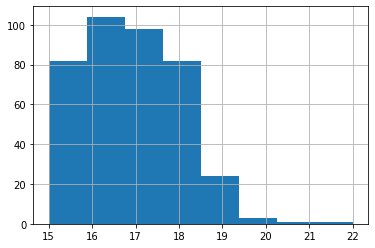

In [6]:
# age — возраст ученика (от 15 до 22)

df.age.hist(bins=8)
df.age.value_counts()

In [7]:
df.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


<AxesSubplot:>

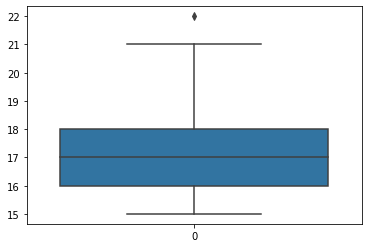

In [8]:
sns.boxplot(data=df.age)

**===>**

**age** - пустых ячеек нет, числовой, непрерывный [15, 22].  
Наиболее распространенный возраст среди учеников - 17 лет.  
Боксплот показывает 1 выброс (22 года), однако значение 22 входит в диаппазон значений из описания (диапазон допустимых значений) и не лишён здравого смысла (разница между 21 годом и 22 годами у учеников на момент сбора данных может быть всего в 1 день, к примеру), поэтому его не удаляем.  

[вернуться к началу документа](#start)

## 2.3. Анализ столбца Medu <a name="Medu"></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


<AxesSubplot:xlabel='Medu', ylabel='count'>

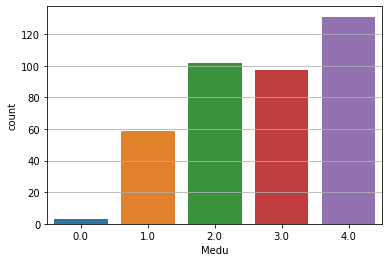

In [9]:
# Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

df.Medu.hist()
df.loc[:, ['Medu']].info()
# df.Medu.value_counts()
sns.countplot(x='Medu', data=df, label='Medu')

In [10]:
# Процентное соотношение неизвестных значений ко всему датасету
print(round(len(df[df.Medu.isnull()])/395*100, 1), '%')

0.8 %


**===>**  

**Medu** - пустых ячеек 3 (0.76 %); признак категориальный, оценочный (пять уникальных значений - описанию соответствуют).   

[вернуться к началу документа](#start)

## 2.4. Анализ столбца Fedu <a name="Fedu"></a>

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

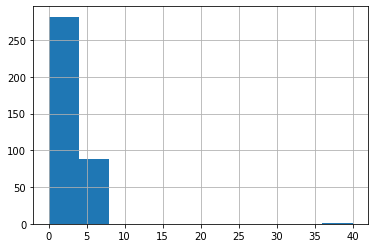

In [11]:
# Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

df.Fedu.hist()
df.Fedu.value_counts()

In [12]:
# Значение Fedu = 40, вероятно, опечатка, и равно "4".
# (а может это "левые" данные, и, судя по распределению остальных признаков, стоит заменить на наиболее частое - "2")
# Заменим на "4"

df.loc[df['Fedu'] == 40.0, 'Fedu'] = 4.0

In [13]:
df.Fedu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

In [14]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.Fedu.isnull()]))
print(round(len(df[df.Fedu.isnull()])/395*100, 1), '%')

24
6.1 %


**===>**  

**Fedu** - пустых ячеек 24 (6.1 %); признак категориальный, оценочный (пять уникальных значений - описанию соответствуют). 

[вернуться к началу документа](#start)

## 2.5. Анализ столбца Mjob <a name="Mjob"></a>

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

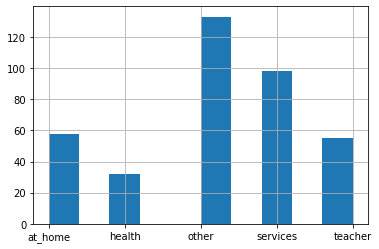

In [15]:
# Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба,
#                       'at_home' - не работает, 'other' - другое)

df.Mjob.hist()
df.Mjob.value_counts()

In [16]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.Mjob.isnull()]))
print(round(len(df[df.Mjob.isnull()])/395*100, 1), '%')

19
4.8 %


**===>**  

**Mjob** - пустых ячеек 19 (4.8 %); признак категориальный, оценочный (пять уникальных значений - описанию соответствуют). 

[вернуться к началу документа](#start)

## 2.6. Анализ столбца Fjob <a name="Fjob"></a>

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

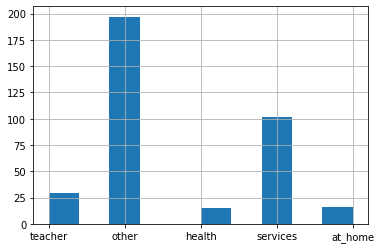

In [17]:
# Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба,
#                       'at_home' - не работает, 'other' - другое)

df.Fjob.hist()
df.Fjob.value_counts()

In [18]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.Fjob.isnull()]))
print(round(len(df[df.Fjob.isnull()])/395*100, 1), '%')

36
9.1 %


**===>**  

**Fjob** - пустых ячеек 36 (9.1 %); признак категориальный, оценочный (пять уникальных значений - описанию соответствуют). 

[вернуться к началу документа](#start)

## 2.7. Анализ столбца reason <a name="reason"></a>

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

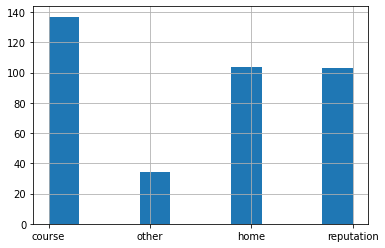

In [19]:
# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы,
#                                'course' - образовательная программа, 'other' - другое)

df.reason.hist()
df.reason.value_counts()

In [20]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.reason.isnull()]))
print(round(len(df[df.reason.isnull()])/395*100, 1), '%')

17
4.3 %


**===>**  

**reason** - пустых ячеек 17 (4.3 %); признак категориальный, оценочный (четыре уникальных значений - описанию соответствуют).   

[вернуться к началу документа](#start)

## 2.8. Анализ столбца guardian <a name="guardian"></a>

mother    250
father     86
other      28
Name: guardian, dtype: int64

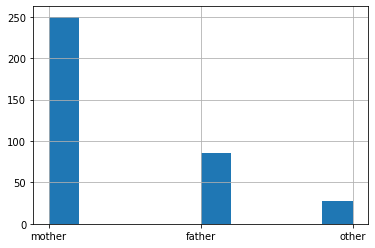

In [21]:
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

df.guardian.hist()
df.guardian.value_counts()

In [22]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.guardian.isnull()]))
print(round(len(df[df.guardian.isnull()])/395*100, 1), '%')

31
7.8 %


**===>**  

**guardian** - пустых ячеек 31 (7.8 %); признак категориальный, оценочный (три уникальных значения - описанию соответствуют).

[вернуться к началу документа](#start)

## 2.9. Анализ столбца traveltime <a name="traveltime"></a>

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

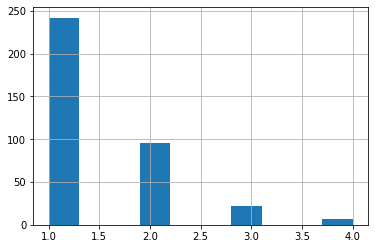

In [23]:
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

df.traveltime.hist()
df.traveltime.value_counts()

In [24]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.traveltime.isnull()]))
print(round(len(df[df.traveltime.isnull()])/395*100, 1), '%')

28
7.1 %


**===>**  

**traveltime** - пустых ячеек 28 (7.1 %); признак категориальный, оценочный (четыре уникальных значения - описанию соответствуют).

[вернуться к началу документа](#start)

## 2.10. Анализ столбца studytime <a name="studytime"></a>

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

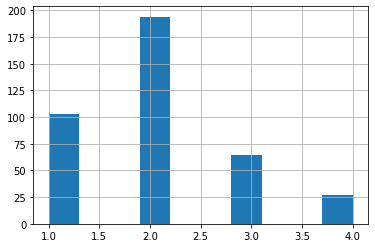

In [25]:
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

df.studytime.hist()
df.studytime.value_counts()

In [26]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.studytime.isnull()]))
print(round(len(df[df.studytime.isnull()])/395*100, 1), '%')

7
1.8 %


**===>**  

**studytime** - пустых ячеек 7 (1.8 %); признак категориальный, оценочный (четыре уникальных значения - описанию соответствуют).

[вернуться к началу документа](#start)

## 2.11. Анализ столбца failures <a name="failures"></a>

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

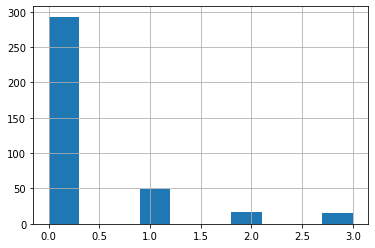

In [27]:
# failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

df.failures.hist()
df.failures.value_counts()

In [28]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.failures.isnull()]))
print(round(len(df[df.failures.isnull()])/395*100, 1), '%')

22
5.6 %


**===>**  

**failures** - пустых ячеек 22 (5.6 %); признак категориальный, оценочный (четыре уникальных значения, в описании значение "3" не входит в диаппазон возможных, возможно, однако оно не противоречит логике и здравому смыслу: количество неудач может и не ограничиваться двумя). 

[вернуться к началу документа](#start)

## 2.12. Анализ столбца famrel <a name="famrel"></a>

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

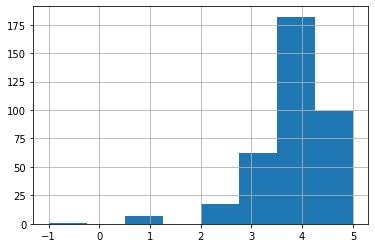

In [29]:
#  famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

df.famrel.hist(bins=8)
df.famrel.value_counts()

In [30]:
# Значение famrel = -1.0, вероятно, опечатка, и равно "1.0".
# (а может это "левые" данные, и, судя по распределению остальных признаков, стоит заменить на наиболее частое - "4.0")
# Заменим на "1.0"

df.loc[df['famrel'] == -1.0, 'famrel'] = 1.0

In [31]:
df.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

In [32]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.famrel.isnull()]))
print(round(len(df[df.famrel.isnull()])/395*100, 1), '%')

27
6.8 %


**===>**  

**famrel** - пустых ячеек 27 (6.8 %); признак категориальный, оценочный (пять уникальных значения - описанию соответствуют).   

[вернуться к началу документа](#start)

## 2.13. Анализ столбца freetime <a name="freetime"></a>

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

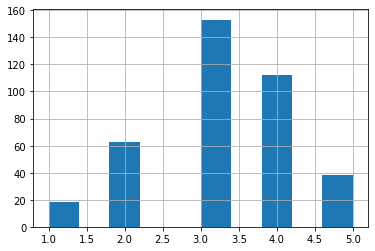

In [33]:
# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

df.freetime.hist()
df.freetime.value_counts()

In [34]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.freetime.isnull()]))
print(round(len(df[df.freetime.isnull()])/395*100, 1), '%')

11
2.8 %


**===>**  

**freetime** - пустых ячеек 11 (2.8 %); признак категориальный, оценочный (пять уникальных значения - описанию соответствуют).  

[вернуться к началу документа](#start)

## 2.14. Анализ столбца goout <a name="goout"></a>

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

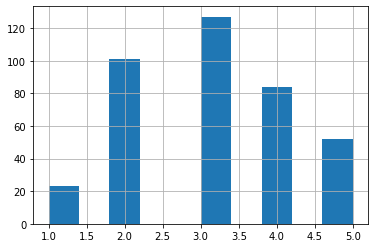

In [35]:
# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

df.goout.hist()
df.goout.value_counts()

In [36]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.goout.isnull()]))
print(round(len(df[df.goout.isnull()])/395*100, 1), '%')

8
2.0 %


**===>**  

**goout** - пустых ячеек 8 (2.0 %); признак категориальный, оценочный (пять уникальных значения - описанию соответствуют).   

[вернуться к началу документа](#start)

## 2.15. Анализ столбца health <a name="health"></a>

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

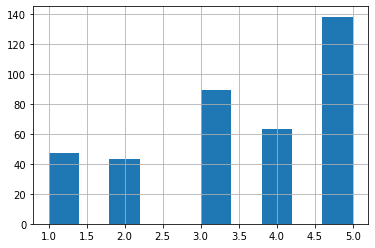

In [37]:
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

df.health.hist()
df.health.value_counts()

In [38]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.health.isnull()]))
print(round(len(df[df.health.isnull()])/395*100, 1), '%')

15
3.8 %


**===>**  

**health** - пустых ячеек 15 (3.8 %); признак категориальный, оценочный (пять уникальных значения - описанию соответствуют).   

[вернуться к началу документа](#start)

## 2.16. Анализ столбца absences <a name="absences"></a>

<AxesSubplot:>

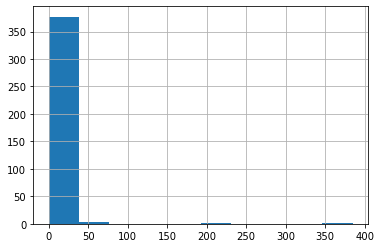

In [39]:
# absences — количество пропущенных занятий

df.absences.hist()

<AxesSubplot:>

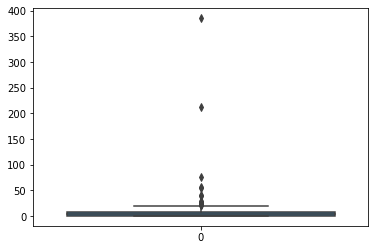

In [40]:
sns.boxplot(data=df.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


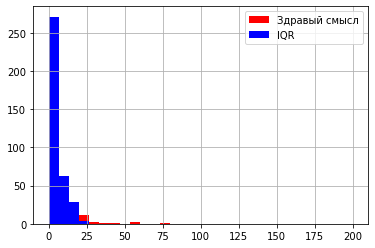

In [41]:
# рассчитаем границы выбросов
median = df.absences.median()
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

# предположим, что данные представлены за год обучения. 
# Учебных дней в году примерно 170 для российских школ. Округлим до 200.

df.absences.loc[df.absences <= 200].hist(bins=30,
                                         range=(0, 200),
                                         color='red',
                                         label='Здравый смысл')

df.absences.loc[df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=30,
                                                                              range=(
                                                                                  0, 200),
                                                                              color='blue',
                                                                              label='IQR')

plt.legend()

In [42]:
df[df.absences > 200]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


Одна запись с 385 пропущенными занятиями, и одна запись с 212 пропусками учебных дней.                  
Невозможно пропустить больше учебных дней, чем максимальное их количество. Удаляем.

In [43]:
df.drop(df[df.absences > 200].index, axis=0, inplace=True)

In [44]:
df.absences.describe()

count    381.000000
mean       5.750656
std        8.088542
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

In [45]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.absences.isnull()]))
print(round(len(df[df.absences.isnull()])/395*100, 1), '%')

12
3.0 %


**===>**  

**absences** - пустых ячеек 12 (3.0 %); признак числовой.   
Наиболее распространенное количество пропусков - от 0 до 8.  

[вернуться к началу документа](#start)

## 2.17. Анализ столбца score <a name="score"></a>

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     26
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      5
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

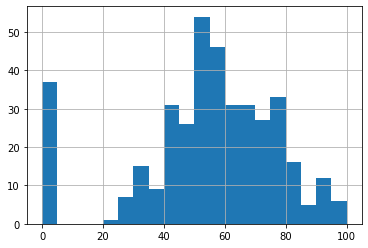

In [46]:
df.score.hist(bins=20)
df.score.value_counts()

<AxesSubplot:>

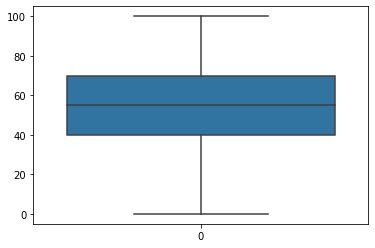

In [47]:
sns.boxplot(data=df.score)

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


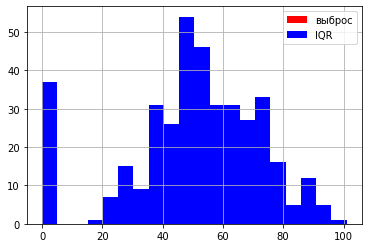

In [48]:
# рассчитаем границы выбросов, если таковые имеются
median = df.score.median()
IQR = df.score.quantile(0.75) - df.score.quantile(0.25)
perc25 = df.score.quantile(0.25)
perc75 = df.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25),
      '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR),
      "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))


df.score.loc[df.score <= 101].hist(bins=20,
                                   range=(0, 101),
                                   color='red',
                                   label='выброс')

df.score.loc[df.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins=20,
                                                                        range=(
                                                                            0, 101),
                                                                        color='blue',
                                                                        label='IQR')

plt.legend()

In [49]:
df.score.describe()

count    387.000000
mean      52.196382
std       22.914748
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [50]:
# Процентное соотношение неизвестных значений ко всему датасету
print(len(df[df.score.isnull()]))
print(round(len(df[df.score.isnull()])/395*100, 1), '%')

6
1.5 %


Так как "score" - это целевая переменная, то пропуски в ней стоит удалить, поскольку попытка предсказать их значение может исказить данные.

In [51]:
df.dropna(subset=['score'], inplace=True)

**===>**  

**score** - пустые ячейки удалены; признак числовой.   
Наиболее распространенное количество баллов - 55.  
Между значением "0.0" и "20.0" нет значений. Однако, анализ показал, что "0.0" - не выброс.  
Распределение без "0.0" - нормальное. 
Возможно, стоит выделить отдельный столбец для нулевых данных.

[вернуться к началу документа](#start)

## 2.18. Анализ столбца studytime_granular <a name="studytime_granular"></a>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  380 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


count    380.000000
mean      -6.110526
std        2.548401
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_granular, dtype: float64

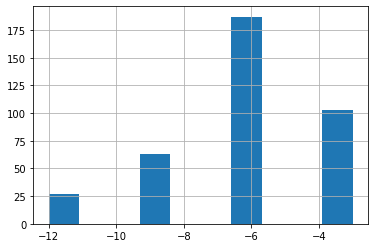

In [52]:
# studytime_granular - столбец отсутствует в описании

df.studytime_granular.hist()
df.loc[:, ['studytime_granular']].info()
df.studytime_granular.describe()

In [53]:
df.studytime_granular.value_counts()

-6.0     187
-3.0     103
-9.0      63
-12.0     27
Name: studytime_granular, dtype: int64

Значения сами по себе ни о чем не говорят.  
По названию столбца предполагаем, что он как-то связан со столбцами 'studytime'

In [54]:
sttime_vs_sttime_granular = df[['studytime', 'studytime_granular']]

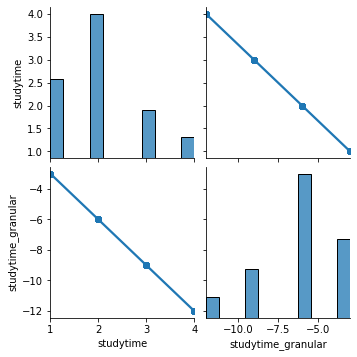

In [55]:
sns.pairplot(sttime_vs_sttime_granular, kind='reg')

In [56]:
df.studytime.value_counts()

2.0    187
1.0    103
3.0     63
4.0     27
Name: studytime, dtype: int64

In [57]:
df.studytime_granular.value_counts()

-6.0     187
-3.0     103
-9.0      63
-12.0     27
Name: studytime_granular, dtype: int64

In [58]:
df['studytime'].corr(df['studytime_granular'])

-1.0

**===>**

**studytime_granular** - анализ показал, что данный столбец есть простое умножение столбца "stydytime" на -3.
Считаю целесообразным удалить столбец "studytime_granular", поскольку он дублирует данные и для дальнейшего анализа не пригодится.  

In [59]:
df.drop(['studytime_granular'], inplace=True, axis=1)

In [60]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


[вернуться к началу документа](#start)

## 2.19. Анализ бинарных столбцов <a name="binary"></a>

In [61]:
# Поскольку бинарные признаки по сути своей одинаковы, напишем единую функцию для их анализа

binary_columns = ['sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid',
                  'activities', 'nursery', 'higher', 'internet', 'romantic']

In [62]:
# Заполняем список-маску уникальных (ненулевых) значений бинарных столбцов
mask_list = []
for elem in binary_columns:
    a = df[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        mask_list.append([a[0], a[1]])
    else:
        print(
            f"Столбец {elem} содержит больше двух уникальных значений: {df[elem].unique()}")
mask_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['no', 'yes'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['no', 'yes']]

In [63]:
# приводим mask_list к единому виду
mask_list[5] = ['yes', 'no']
mask_list[6] = ['yes', 'no']
mask_list[7] = ['yes', 'no']
mask_list[11] = ['yes', 'no']

In [64]:
mask_list

[['F', 'M'],
 ['U', 'R'],
 ['GT3', 'LE3'],
 ['A', 'T'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no'],
 ['yes', 'no']]

In [65]:
# заменяем бинарные признаки на "0" и "1"
for i in range(len(binary_columns)):
    elem = binary_columns[i]
    df.loc[df[elem] == mask_list[i][0], elem] = 1
    df.loc[df[elem] == mask_list[i][1], elem] = 0

In [66]:
# проверка
chek_list = []
for elem in binary_columns:
    a = df[elem].unique()
    a = a[~pd.isnull(a)]
    if len(a) == 2:
        chek_list.append([a[0], a[1]])
    else:
        print(
            f"Столбец {elem} содержит больше двух уникальных значений: {df[elem].unique()}")
chek_list

[[1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1],
 [0, 1],
 [0, 1],
 [1, 0],
 [1, 0],
 [1, 0],
 [0, 1]]

In [67]:
df.loc[:, binary_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         387 non-null    object
 1   address     372 non-null    object
 2   famsize     360 non-null    object
 3   Pstatus     342 non-null    object
 4   schoolsup   378 non-null    object
 5   famsup      350 non-null    object
 6   paid        348 non-null    object
 7   activities  373 non-null    object
 8   nursery     372 non-null    object
 9   higher      367 non-null    object
 10  internet    353 non-null    object
 11  romantic    356 non-null    object
dtypes: object(12)
memory usage: 39.3+ KB


In [68]:
# приведем типы данных к единому
df['sex'] = df['sex'].astype(object)

In [69]:
df.loc[:, binary_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         387 non-null    object
 1   address     372 non-null    object
 2   famsize     360 non-null    object
 3   Pstatus     342 non-null    object
 4   schoolsup   378 non-null    object
 5   famsup      350 non-null    object
 6   paid        348 non-null    object
 7   activities  373 non-null    object
 8   nursery     372 non-null    object
 9   higher      367 non-null    object
 10  internet    353 non-null    object
 11  romantic    356 non-null    object
dtypes: object(12)
memory usage: 39.3+ KB


In [70]:
df[binary_columns].describe(include=['object'])

,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,387,372,360,342,378,350,348,373,372,367,353,356
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,1,1,1,0,0,1,0,1,1,1,1,0
freq,203,289,254,307,330,215,196,192,295,348,299,233


In [71]:
# Считаем количество пропусков в данных
absence = []
absence_procent = []
for i in range(len(binary_columns)):
    absence.append(len(df[df[binary_columns[i]].isnull()]))
    absence_procent.append(
        round(len(df[df[binary_columns[i]].isnull()])/395*100, 1))
pd.DataFrame({'column': binary_columns, 'absence': absence,
              '%': absence_procent}, columns=['column', 'absence', '%'])

,column,absence,%
0,sex,0,0.0
1,address,15,3.8
2,famsize,27,6.8
3,Pstatus,45,11.4
4,schoolsup,9,2.3
5,famsup,37,9.4
6,paid,39,9.9
7,activities,14,3.5
8,nursery,15,3.8
9,higher,20,5.1


**===>**

**бинарные столбцы** - столбцы приведены к единому числовому виду ("0"|"1").  
Столбцы Pststus и paid имеют наибольшее количество пропусков.

[вернуться к началу документа](#start)

вернуться к...
2. [Первичный анализ](#Первичный_анализ)  
   2.1. [Анализ столбца school](#school)  
   2.2. [Анализ столбца age](#age)  
   2.3. [Анализ столбца Medu](#Medu)  
   2.4. [Анализ столбца Fedu](#Fedu)  
   2.5. [Анализ столбца Mjob](#Mjob)  
   2.6. [Анализ столбца Fjob](#Fjob)  
   2.7. [Анализ столбца reason](#reason)  
   2.8. [Анализ столбца guardian](#guardian)  
   2.9. [Анализ столбца traveltime](#traveltime)  
   2.10. [Анализ столбца studytime](#studytime)  
   2.11. [Анализ столбца failures](#failures)  
   2.12. [Анализ столбца famrel](#famrel)  
   2.13. [Анализ столбца freetime](#freetime)  
   2.14. [Анализ столбца goout](#goout)  
   2.15. [Анализ столбца health](#health)  
   2.16. [Анализ столбца absences](#absences)  
   2.17. [Анализ столбца score](#score)  
   2.18. [Анализ столбца studytime_granular](#studytime_granular)  
   2.19. [Анализ бинарных столбцов (sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic)](#binary)  

# 3. Корреляционный анализ <a name="corr"></a>

## 3.1. Корреляционный анализ ЧИСЛОВЫХ критериев <a name="num"></a> 

In [72]:
# Список числовых критериев
num_columns = df[['age', 'absences', 'score']]

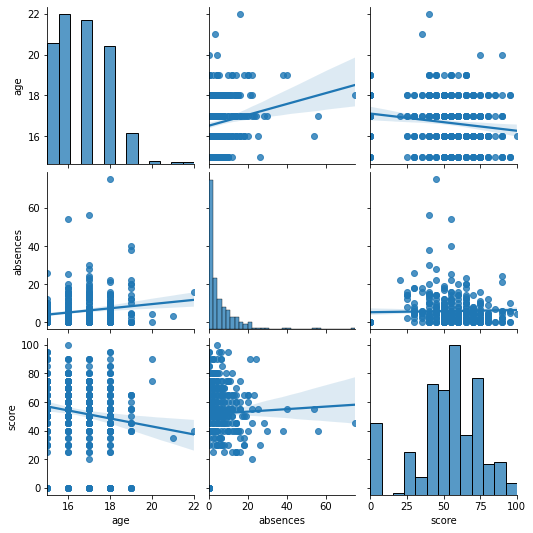

In [73]:
sns.pairplot(num_columns, kind='reg')

In [74]:
num_columns.corr()

,age,absences,score
age,1.000000,0.171939,-0.153488
absences,0.171939,1.000000,0.031698
score,-0.153488,0.031698,1.000000


**===>**

**числовые критерии** - оба параметра ("age" и "absences") остаются, т.к. они не скоррелированы между собой.  
Наблюдается обратная корреляция между "age" и "score". Это может быть причиной того,  
что в числе взрослых в основном ученики, которые оставались на второй год из-за неуспеваемости.  


[вернуться к началу документа](#start)

## 3.2. Корреляционный анализ КАТЕГОРИАЛЬНЫХ критериев <a name="categorial"></a>  

### 3.2.1. Анализ бинарных критериев <a name="categ_binary"></a>

In [75]:
binary_columns.append('school')

In [76]:
binary_columns

['sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'school']

In [77]:
# функция для бинарных столбцов
def binary_boxplot(column):
    fig, ax = plt.subplots(figsize=(10, 3))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

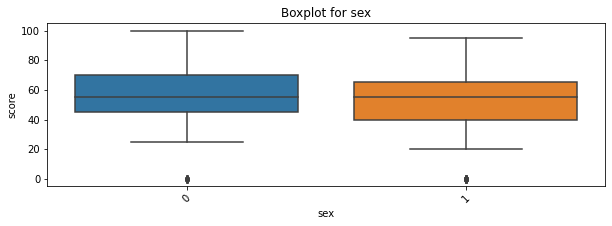

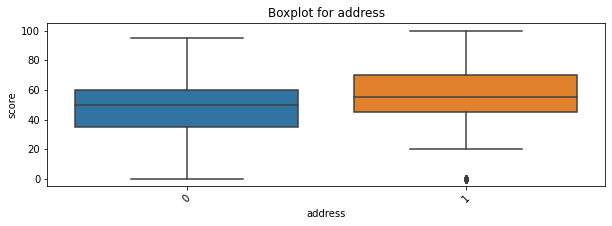

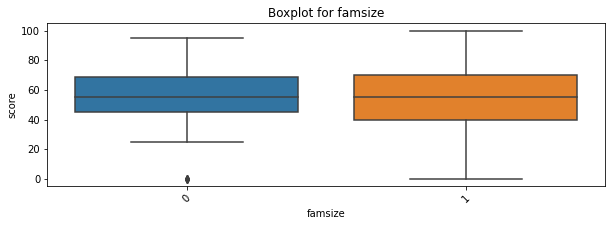

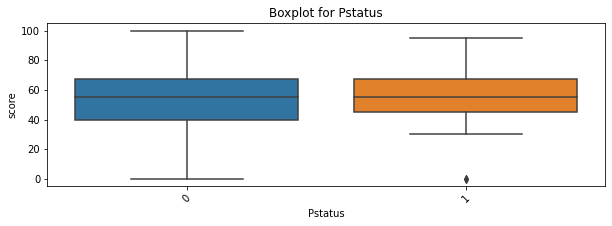

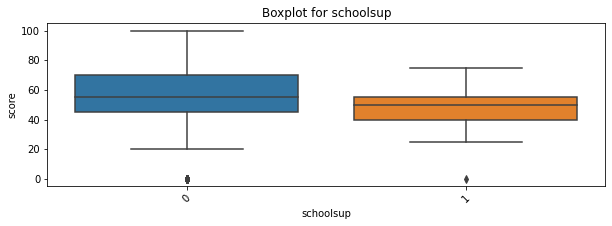

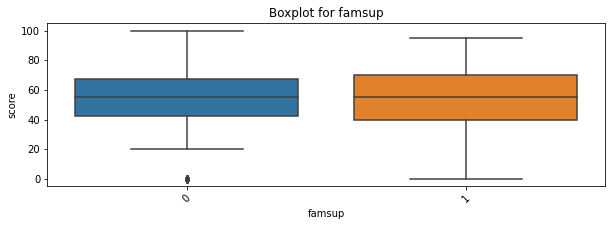

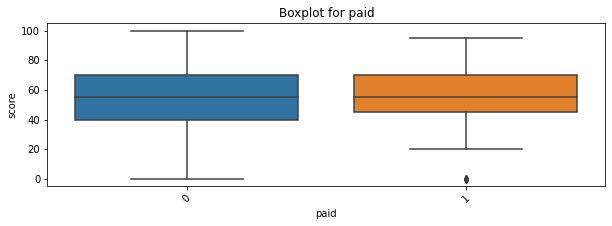

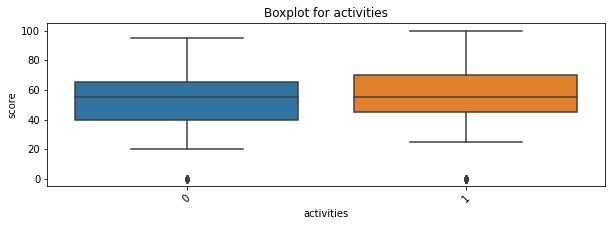

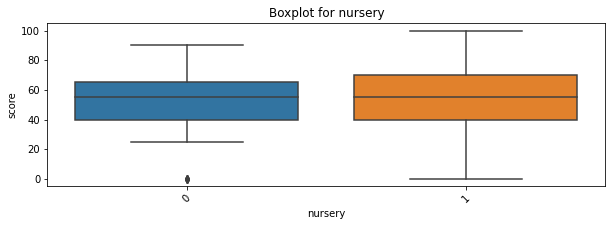

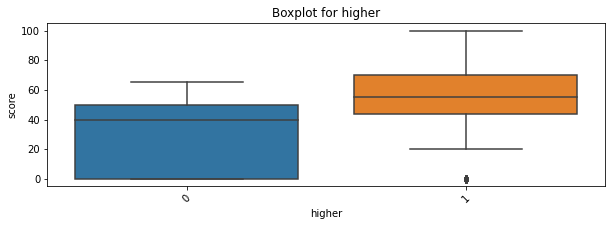

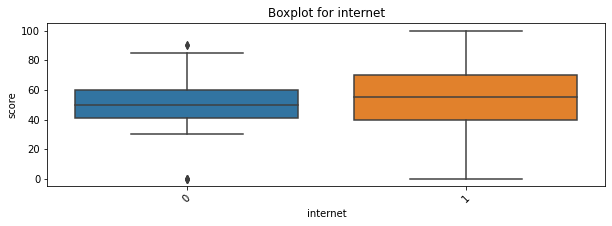

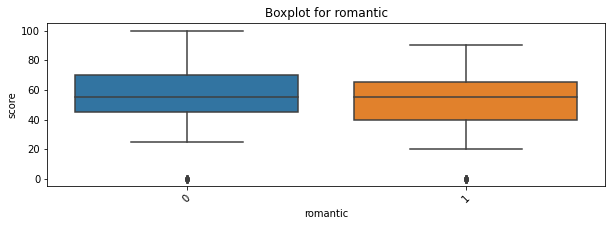

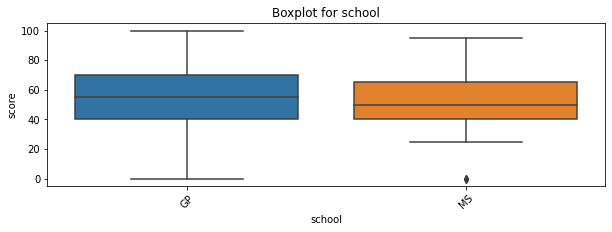

In [78]:
for column in binary_columns:
    binary_boxplot(column)

**===>**

**бинарные критерии** - боксплот для "higher" сильно отличается.   
  
[вернуться к началу документа](#start)

### 3.2.2. Анализ оценочных критериев <a name="categ_rating"><a/>

In [79]:
# Получим список оценочных критериев

categ_columns = list(df.columns)

for column in num_columns:
    categ_columns.remove(column)

for column in binary_columns:
    categ_columns.remove(column)

In [80]:
categ_columns

['Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'health']

In [81]:
# функция для оценочных критериев

def categ_boxplot(column):
    fig, ax = plt.subplots(figsize=(12, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

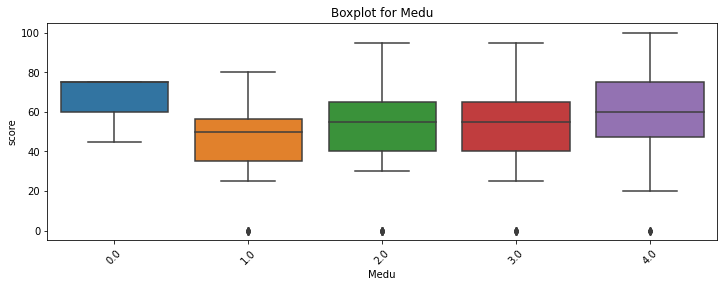

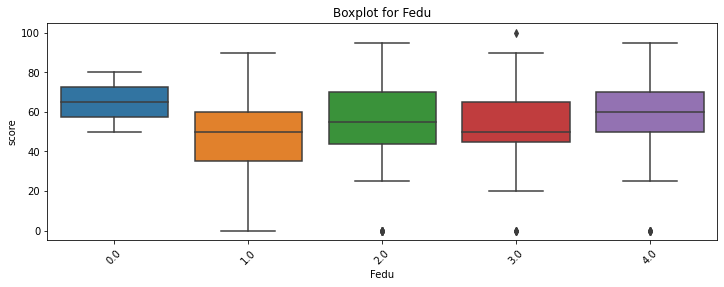

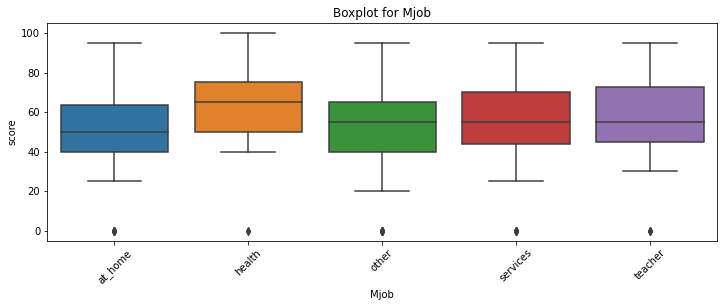

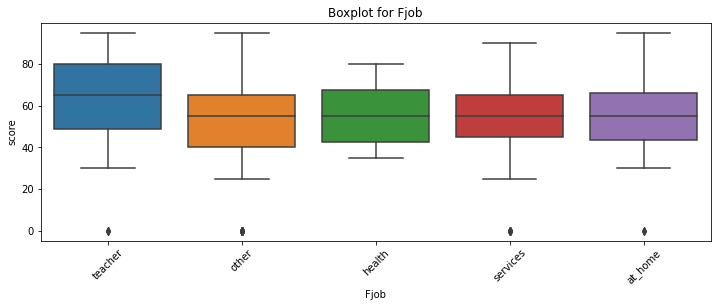

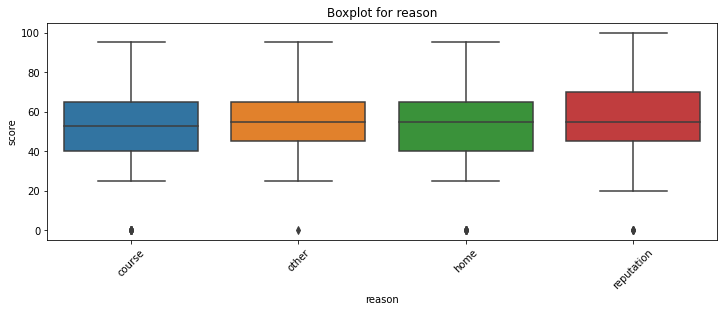

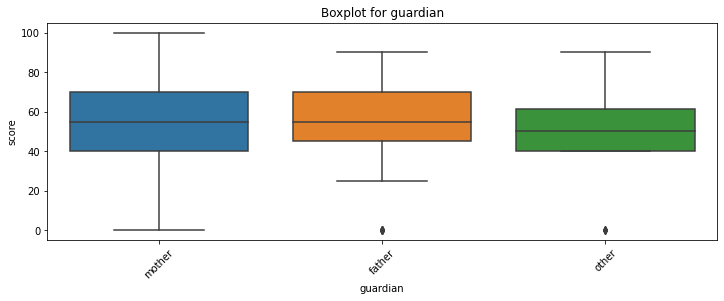

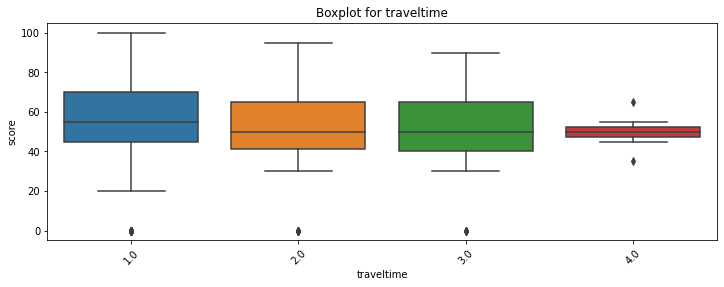

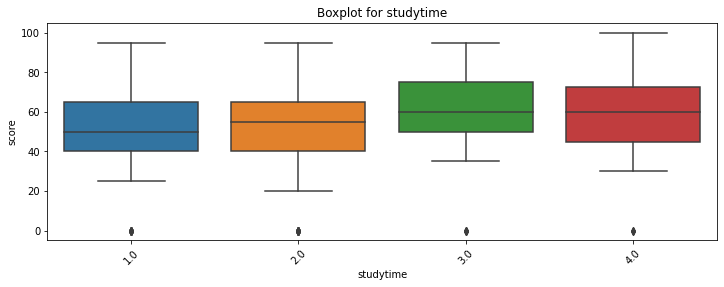

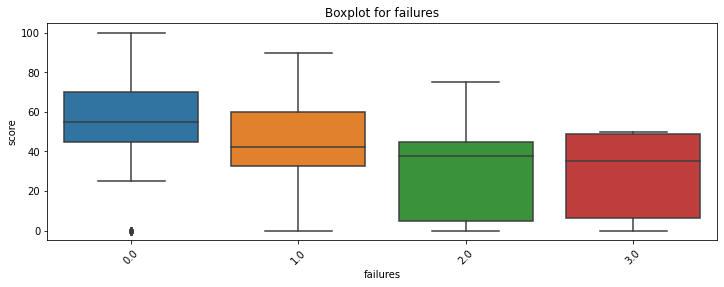

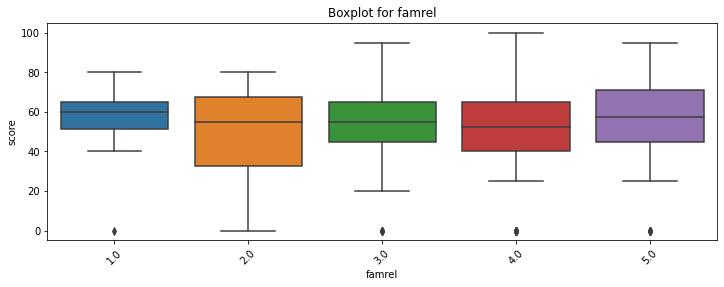

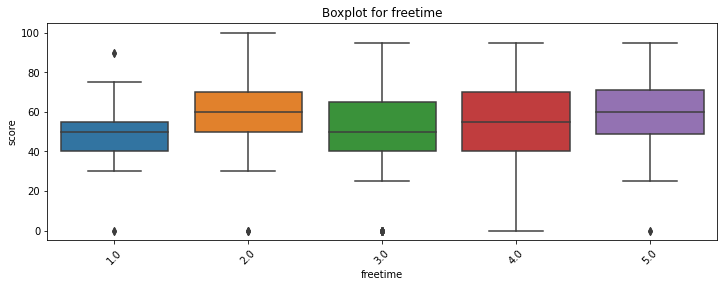

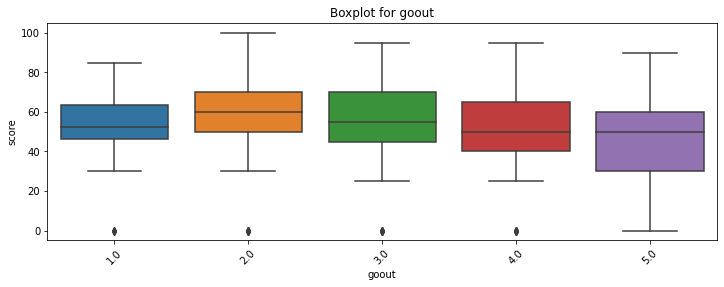

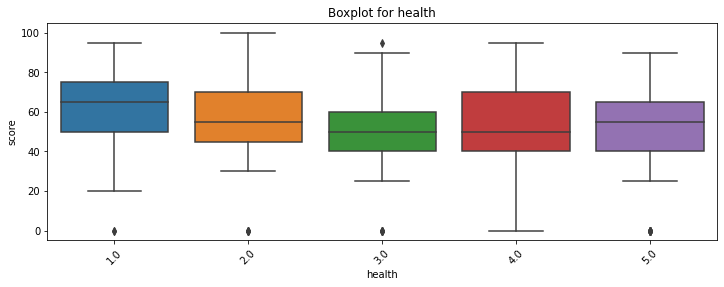

In [82]:
for column in categ_columns:
    categ_boxplot(column)

**===>**

**оценочные критерии** - плотности распределения сильно отличаются для:   
'Medu',    
'Fedu',    
'failures'  

[вернуться к началу документа](#start)

## 3.3. Тест Стьюдента по категориальным признакам <a name="ttest"></a>  

С помощью теста Стьюдента проверим, есть ли статистическая разница в распределении оценок по номинативным признакам. Проверим нулевую гипотезу о том, что распределения "score" по различным параметрам неразличимы.

In [83]:
all_categ_columns = list(df.columns)

for column in num_columns:
    all_categ_columns.remove(column)

In [84]:
all_categ_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'health']

In [85]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [86]:
for elem in all_categ_columns:
    get_stat_dif(elem)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


**===>**

**по тесту Стьюдента** - достаточно отличаются 7 параметров:   
address    
Medu   
Mjob   
failures   
higher  
romantic  
goout  

[вернуться к началу документа](#start)

**===>**  

**По итогу** - получилось 9 важных переменных, которые, возможно, оказывают влияние на "score":   
age, absences, address, Medu, Mjob, failures, higher, romantic, goout

In [87]:
model_colunms = df.loc[:, ['age', 'absences', 'address', 'Medu', 'Mjob',
                           'failures', 'higher', 'romantic', 'goout', 'score']]

In [88]:
model_colunms.head()

,age,absences,address,Medu,Mjob,failures,higher,romantic,goout,score
0,18,6.0,1,4.0,at_home,0.0,1,0,4.0,30.0
1,17,4.0,1,1.0,at_home,0.0,1,0,3.0,30.0
2,15,10.0,1,1.0,at_home,3.0,1,NaN,2.0,50.0
3,15,2.0,1,4.0,health,0.0,1,1,2.0,75.0
4,16,4.0,1,3.0,other,0.0,1,0,2.0,50.0


In [89]:
model_colunms.corr()

,age,absences,Medu,failures,goout,score
age,1.000000,0.171939,-0.144444,0.192115,0.114666,-0.153488
absences,0.171939,1.000000,0.096016,0.068090,0.038435,0.031698
Medu,-0.144444,0.096016,1.000000,-0.238950,0.070811,0.216238
failures,0.192115,0.068090,-0.238950,1.000000,0.101540,-0.344276
goout,0.114666,0.038435,0.070811,0.101540,1.000000,-0.122992
score,-0.153488,0.031698,0.216238,-0.344276,-0.122992,1.000000


<AxesSubplot:>

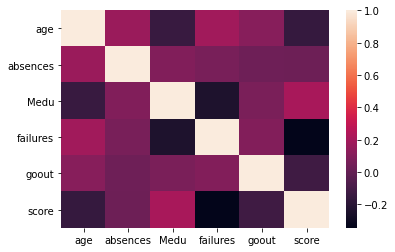

In [90]:
temp_corr = model_colunms.corr()
sns.heatmap(temp_corr)

**===>**  

По отобранным столбцам значений очень близких к 1 или -1 нет, т.е. нет сильно скоррелированных (дублированных) столбцов.

# 4. Предложения по заполнению пропусков <a name="omissions"></a>

In [91]:
absence = []
absence_procent = []
all_columns = list(df.columns)
for i in range(len(all_columns)):
    absence.append(len(df[df[all_columns[i]].isnull()]))
    absence_procent.append(
        round(len(df[df[all_columns[i]].isnull()])/395*100, 1))
pd.DataFrame({'column': all_columns, 'absence': absence,
              '%': absence_procent}, columns=['column', 'absence', '%'])

,column,absence,%
0,school,0,0.0
1,sex,0,0.0
2,age,0,0.0
3,address,15,3.8
4,famsize,27,6.8
5,Pstatus,45,11.4
6,Medu,3,0.8
7,Fedu,24,6.1
8,Mjob,19,4.8
9,Fjob,36,9.1


***address*** - пропуски можно заменить на:
- наиболее частое значение,
- исходя из параметра "traveltime" (предположить, что ученики, живущие за городом, больше времени уделяют прогулке по вынужденной причине) 

***famsize*** - пропуски можно заменить на:
- наиболее частое значение

***Pstatus*** - пропуски можно заменить на:
- наиболее частое значение
- исходя из параметра "guardian" (если опекун мама, то ставить совместное проживание родителей, в ином случае - раздельное)

***Medu*** - пропуски можно заменить на:
- поскольку наблюдается положительная корреляция между 'score' и 'Medu', можно проранжиовать 'score' в соответствии с количеством критериев в 'Medu', и пропуски в 'Medu' заполнить на основании 'score' 

***Fedu*** - пропуски можно заменить на:
- наиболее частое значение,
- посмотреть, возможно есть зависимость по аналогии с 'Medu'
- возможно, есть связь между 'Medu' и 'Fedu' (родители вместе учились и познакомились, поэтому можно исходя из этих столбцов заполнить рандомно +-1 к уровню обучения у известного родителя)

***Mjob*** - пропуски можно заменить на:
- наиболее частое значение

***Fjob*** - пропуски можно заменить на:
- наиболее частое значение

***reason*** - пропуски можно заменить на:
- посмотреть по 'traveltime' и 'address' возможную близость к школе и заполнить ближайших значением 'home'; по столбцу 'higher' можно предположить, что выбирали школу исходя из преподаваемых занятий ('course'); по столбцу 'paid' - возможно, причиной стал рейтинг школы ('reputation'); остальным присвоить значение 'other'.  

Верность данных предположений о замене стоит предварительно проверить

***guardian*** - пропуски можно заменить на:
- наиболее частое значение,
- посмотреть на 'Pstatus', 'Mjob' и 'Fjob' (если родители не вместе и у мамы нет данных о работе, а у папы есть, то опекун папа; если и у папы нет, то опекун - другой человек, в противном случае опекун - мама) 

***traveltime*** - пропуски можно заменить на:
- наиболее частое значение,
- исходя из значения 'address' (если ученик живет за городом, то присвоить значение, характерное для учеников, живущих за городом (наиболее частое среди живущих за городом), если в городе - то минимальное)

***studytime*** - пропуски можно заменить на:
- наиболее частое значение

***failures*** - пропуски можно заменить на:
- наиболее частое значение,
- поскольку имеется обратная корреляция со столбцом 'score', можно проранжиовать 'score' в соответствии с количеством критериев в 'failures', и пропуски в 'failures' заполнить на основании 'score'

***schoolsup*** - пропуски можно заменить на:
- наиболее частое значение

***famsup*** - пропуски можно заменить на:
- наиболее частое значение

***paid*** - пропуски можно заменить на:
- наиболее частое значение

***activities*** - пропуски можно заменить на:
- наиболее частое значение

***nursery*** - пропуски можно заменить на:
- наиболее частое значение

***higher*** - пропуски можно заменить на:
- наиболее частое значение,
- возможно, есть зависимость с 'paid' и 'reason'

***internet*** - пропуски можно заменить на:
- наиболее частое значение,
- можно проверить по 'address', на сколько скоррелировано наличие интернета и загородная жизнь.

***romantic*** - пропуски можно заменить на:
- наиболее частое значение

***famrel*** - пропуски можно заменить на:
- наиболее частое значение,
- возможно имеется корреляция со столбцом 'abcences' (если плохие отношения в семье, то у ученика нет желания/возможности посещать учёбу)

***freetime*** - пропуски можно заменить на:
- наиболее частое значение,
- возможно есть корреляция с 'goout' (у кого больше свободного времени, тот больше гуляет и наоборот)

***goout*** - пропуски можно заменить на:
- наиболее частое значение,
- по аналогии с 'freetime'

***health*** - пропуски можно заменить на:
- наиболее частое значение

***absences*** - пропуски можно заменить на:
- наиболее частое значение

вернуться к...
2. [Первичный анализ](#Первичный_анализ)  
   2.1. [Анализ столбца school](#school)  
   2.2. [Анализ столбца age](#age)  
   2.3. [Анализ столбца Medu](#Medu)  
   2.4. [Анализ столбца Fedu](#Fedu)  
   2.5. [Анализ столбца Mjob](#Mjob)  
   2.6. [Анализ столбца Fjob](#Fjob)  
   2.7. [Анализ столбца reason](#reason)  
   2.8. [Анализ столбца guardian](#guardian)  
   2.9. [Анализ столбца traveltime](#traveltime)  
   2.10. [Анализ столбца studytime](#studytime)  
   2.11. [Анализ столбца failures](#failures)  
   2.12. [Анализ столбца famrel](#famrel)  
   2.13. [Анализ столбца freetime](#freetime)  
   2.14. [Анализ столбца goout](#goout)  
   2.15. [Анализ столбца health](#health)  
   2.16. [Анализ столбца absences](#absences)  
   2.17. [Анализ столбца score](#score)  
   2.18. [Анализ столбца studytime_granular](#studytime_granular)  
   2.19. [Анализ бинарных столбцов (sex, address, famsize, Pstatus, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic)](#binary)  

# 5. Выводы <a name="summary"></a> 

В результате анализа параметров выяснено:  
  
- в данных имеются пропуски, есть предложения по их заполнению;  
   
- в параметре "age" выявлен выброс 22 года, однако путем логических рассуждений, данное значение оставлено без изменений;   
  
- в параметре "abcences" выявлен ряд выбросов, однако мы точно не знаем, за какой период были собраны данные;  
  
- для дальнейшего построения модели выявлено 9 нескоррелированных между собой признаков: age, absences, address, Medu, Mjob, failures, higher, romantic, goout.  
  
[вернуться к началу документа](#start)